1. **Chargement des datasets**

*Changer le chemin selon vos emplacements du fichier*

In [6]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
chemin_dossier = '/Machine Learning/TP/Tp-ML-M2-1-ISPM/datasets/'
dataset = pd.read_csv("/content/drive/MyDrive"+chemin_dossier+"Mall_Customers.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. **Nettoyage et prétraitement**

In [9]:
# Vérifier s'il y a des valeurs manquantes
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Genre_encoded'] = le.fit_transform(dataset['Gender'])  # Male = 1, Female = 0

Standardisation des variables quantitatives

In [17]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables numériques à standardiser
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset[features])

# On peut les convertir en DataFrame pour lisibilité
import numpy as np
dataset_scaled = pd.DataFrame(dataset_scaled, columns=features)

In [18]:
print(dataset_scaled.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


3. **EDA univariée et multivariée : Histogrammes et boxplots de chaque variable. Matrice de corrélation et scatterplot matrix.**

EDA univariee: Histogrammes et Boxplots

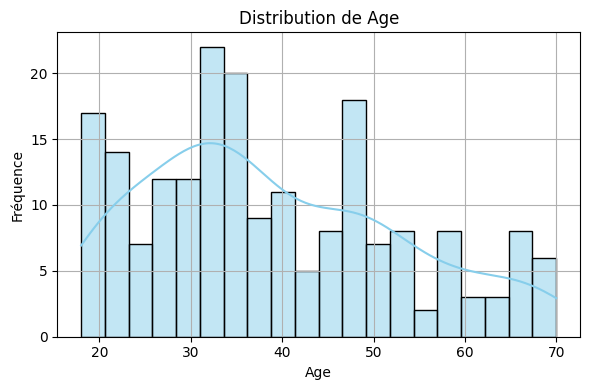

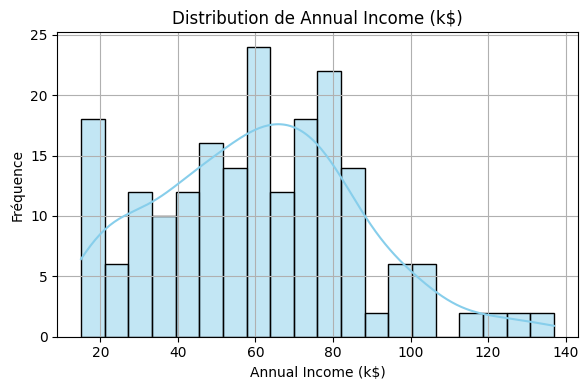

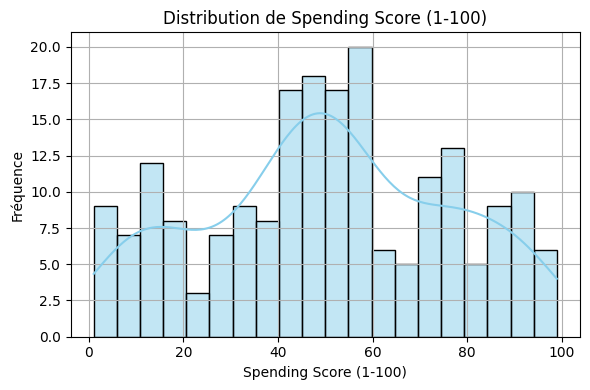

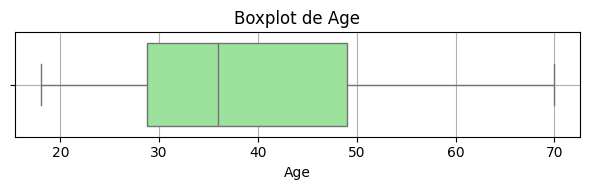

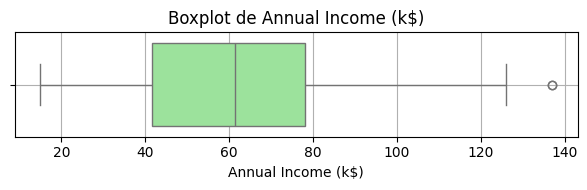

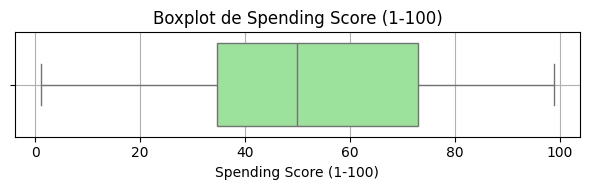

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Histogrammes
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Boxplots
for var in variables:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=dataset[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


EDA multivariée: corrélation et scatterplot matrix

corrélation

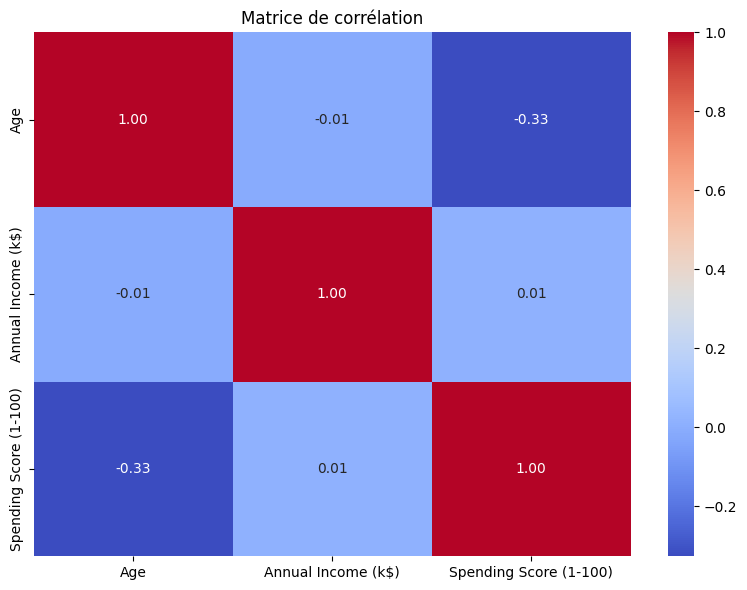

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

scatterplot matrix

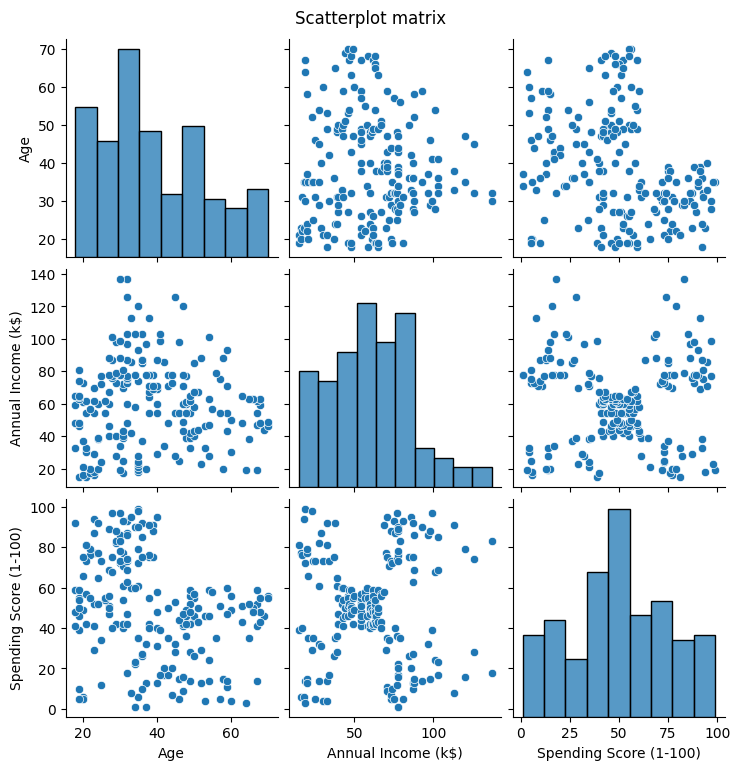

In [27]:
sns.pairplot(dataset[variables])
plt.suptitle("Scatterplot matrix", y=1.02)
plt.show()